# Analysis of different Education Methodologies

NOTE: Install skfuzzy before running these scripts, skfuzzy does not come pre-packaged and needs to be installed via the package, scikit-fuzzy

This notebook uses three different clustering algorithms namely:
* K-Means
* Agglomerative
* Fuzzy C Means

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skfuzzy.cluster import cmeans, cmeans_predict
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering

sns.set(style='whitegrid', context='notebook', font_scale=1)

%matplotlib inline

In [9]:
#Getting data into the main memory
cat1 = pd.read_csv('cat1.csv')
print(cat1.columns)

cat2 = pd.read_csv('cat2.csv')
print(cat2.columns)

flipped_classroom = pd.read_csv('flipped_class.csv')
print(flipped_classroom.columns)

lab_ctrl_grp = pd.read_csv('lab_ctrl_grp.csv')
print(lab_ctrl_grp.columns)

virtual_class = pd.read_csv('virtual_class.csv')
print(virtual_class.columns)

Index(['CAT1', 'gender'], dtype='object')
Index(['CAT2'], dtype='object')
Index(['session 1(10)', 'session 2 (10)', 'session 3 (10)', 'session 4 (10)',
       'session 5 (10)', 'Total 50 marks'],
      dtype='object')
Index(['session 1(10)', 'session 2 (10)', 'session 3 (10)', 'session 4 (10)',
       'session 5 (10)', 'Total 50 marks'],
      dtype='object')
Index(['session 1(10)', 'session 2 (10)', 'session 3 (10)', 'session 4 (10)',
       'session 5 (10)', 'Total 50 marks'],
      dtype='object')


In [10]:
d = {'CAT1': cat1['CAT1'], 
     'CAT2': cat2['CAT2'], 
     'flp_cls_mrks': flipped_classroom['Total 50 marks'], 
     'lab_ctrl_mrks':lab_ctrl_grp['Total 50 marks'], 
     'virtual_marks':virtual_class['Total 50 marks'], 
     'CAT1-CAT2': cat1['CAT1'] - cat2['CAT2'], 
     'gender':cat1['gender']}
combined =  pd.DataFrame(data = d)
# Since the dataset has some male labels as M and m and some female labels as F and f we need to capitalize all of them to remove discrepancies from the data
combined.gender = combined.gender.str.upper()
combined.head(10)

,CAT1,CAT2,flp_cls_mrks,lab_ctrl_mrks,virtual_marks,CAT1-CAT2,gender
0,31.0,35.0,32.0,36.0,30.0,-4.0,M
1,21.0,21.0,34.0,30.0,32.0,0.0,M
2,39.0,33.0,31.0,27.0,25.0,6.0,M
3,16.0,35.0,37.0,35.0,28.0,-19.0,M
4,38.0,23.0,40.0,38.0,24.0,15.0,F
5,22.0,13.0,30.0,36.0,35.0,9.0,F
6,14.0,12.0,37.0,33.0,34.0,2.0,F
7,20.0,22.0,34.0,32.0,31.0,-2.0,F
8,24.0,13.0,31.0,30.0,27.0,11.0,F
9,23.0,24.0,34.0,32.0,33.0,-1.0,F


In [15]:
# To drop any NaN values from the dataframe that essentially create problems in sns pairplot.
combined = combined.dropna()
combined.isna().values.any()

False

In [13]:
combined.describe()

,CAT1,CAT2,flp_cls_mrks,lab_ctrl_mrks,virtual_marks,CAT1-CAT2
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,24.500000,22.950704,38.183099,32.676056,28.838028,1.549296
std,7.306608,7.136290,4.850415,4.523460,3.915123,8.437150
min,10.000000,4.000000,20.000000,22.000000,19.000000,-19.000000
25%,19.000000,18.000000,36.000000,30.000000,26.000000,-4.000000
50%,25.000000,23.500000,38.000000,32.000000,29.000000,1.000000
75%,30.000000,28.000000,41.000000,36.000000,32.000000,7.750000
max,39.000000,38.000000,48.000000,44.000000,38.000000,21.000000


In [48]:
#Slow learners
combined[combined.iloc[:,:5] < 20].iloc[:, 0:2].dropna()

,CAT1,CAT2
6,14.0,12.0
12,10.0,15.0
15,17.0,15.0
43,17.0,12.0
46,19.0,19.0
65,19.0,12.0
91,17.0,13.0
94,17.0,14.0
108,16.0,15.0
113,18.0,16.0


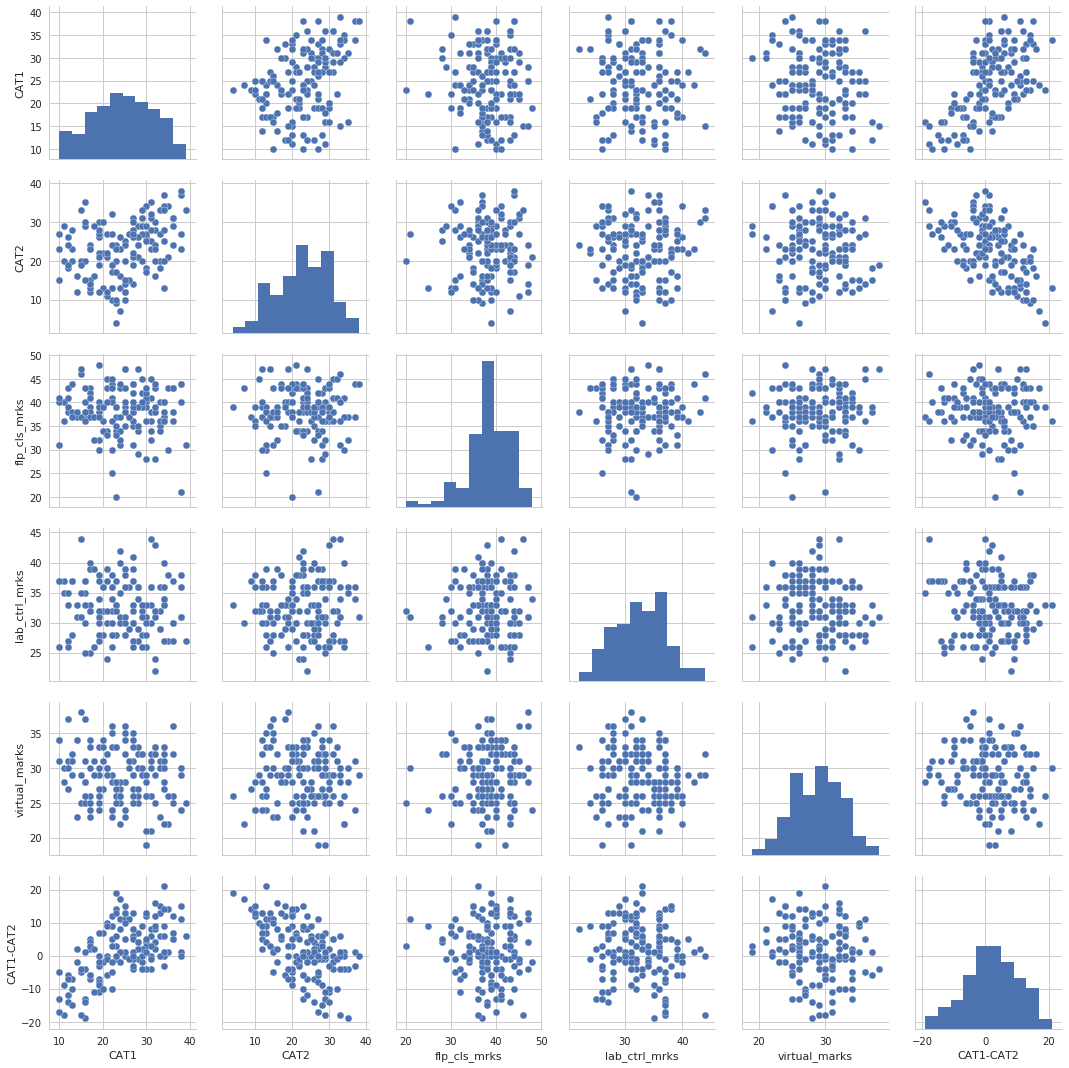

In [68]:
sns.pairplot(combined)

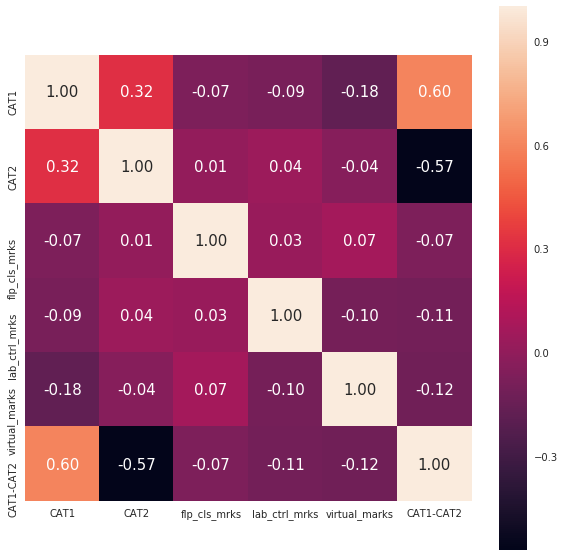

In [7]:
cm = np.corrcoef(combined.iloc[:, :6].values.T)
plt.figure(figsize=(10,10))
hm = sns.heatmap(cm, cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size':15}, 
                 yticklabels=combined.columns[:6].values, 
                 xticklabels=combined.columns[:6].values)
plt.show()

Now that we have a scatter plot between all the parameter we need to compare between, next we will run K Means clustering on the relevant relations and visualize the results

## K-Means Clustering

Total candidates with label 0 =  59
Males with label 0 =  36
Females with label 0 =  23


Total candidates with label 1 =  45
Males with label 1 =  29
Females with label 1 =  16


Total candidates with label 2 =  38
Males with label 2 =  18
Females with label 2 =  20




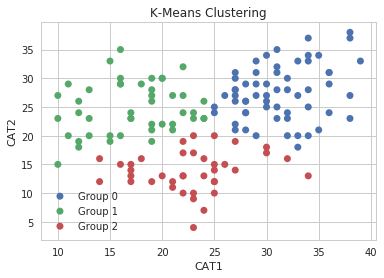

In [86]:
def visualize_clustering_in_KMeans(column_list):
    kmeans = KMeans(n_clusters=3, random_state=0).fit(combined[column_list])
    y_kmeans = kmeans.predict(combined[column_list])
    cent = kmeans.cluster_centers_
    labels = pd.DataFrame(y_kmeans)

    for i in labels.iloc[:, 0].unique():
        label_filter = labels.iloc[:, 0] == i
        plt.scatter(combined[column_list[0]][(label_filter == True)], combined[column_list[1]][(label_filter == True)], edgecolors='none', label="Group {:g}".format(i))
        print('Total candidates with label %d = '%i, len(combined[(label_filter == True)]))
        print('Males with label %d = '%i, len(combined[(label_filter == True) & (combined['gender']=='M')]))
        print('Females with label %d = '%i, len(combined[(label_filter == True) & (combined['gender']=='F')]))
        print('\n')
        
    plt.legend()
    plt.title('K-Means Clustering')    
    plt.xlabel(column_list[0])
    plt.ylabel(column_list[1])
    
    return cent, labels

cents, labels = visualize_clustering_in_KMeans(['CAT1', 'CAT2'])

Total candidates with label 1 =  68
Males with label 1 =  41
Females with label 1 =  27


Total candidates with label 0 =  46
Males with label 0 =  23
Females with label 0 =  23


Total candidates with label 2 =  28
Males with label 2 =  19
Females with label 2 =  9




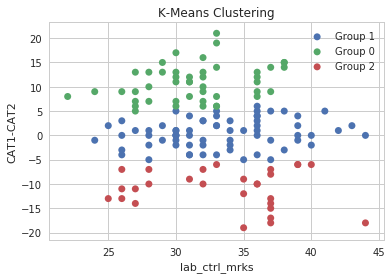

In [87]:
cents, labels = visualize_clustering_in_KMeans(['lab_ctrl_mrks', 'CAT1-CAT2'])

Total candidates with label 0 =  68
Males with label 0 =  41
Females with label 0 =  27


Total candidates with label 1 =  31
Males with label 1 =  21
Females with label 1 =  10


Total candidates with label 2 =  43
Males with label 2 =  21
Females with label 2 =  22




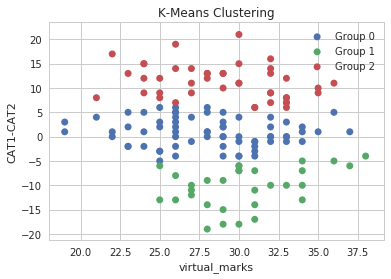

In [88]:
cents, labels = visualize_clustering_in_KMeans(['virtual_marks', 'CAT1-CAT2'])

Total candidates with label 2 =  65
Males with label 2 =  39
Females with label 2 =  26


Total candidates with label 0 =  39
Males with label 0 =  27
Females with label 0 =  12


Total candidates with label 1 =  38
Males with label 1 =  17
Females with label 1 =  21




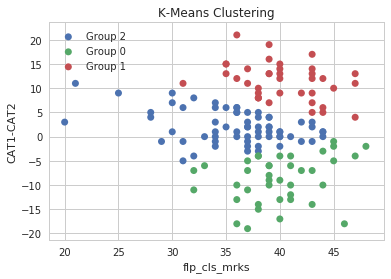

In [89]:
cents, labels = visualize_clustering_in_KMeans(['flp_cls_mrks', 'CAT1-CAT2'])

Total candidates with label 2 =  40
Males with label 2 =  22
Females with label 2 =  18


Total candidates with label 1 =  55
Males with label 1 =  28
Females with label 1 =  27


Total candidates with label 0 =  47
Males with label 0 =  33
Females with label 0 =  14




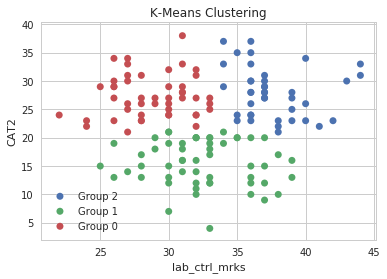

In [90]:
cents, labels = visualize_clustering_in_KMeans(['lab_ctrl_mrks', 'CAT2'])

Total candidates with label 0 =  54
Males with label 0 =  39
Females with label 0 =  15


Total candidates with label 1 =  54
Males with label 1 =  26
Females with label 1 =  28


Total candidates with label 2 =  34
Males with label 2 =  18
Females with label 2 =  16




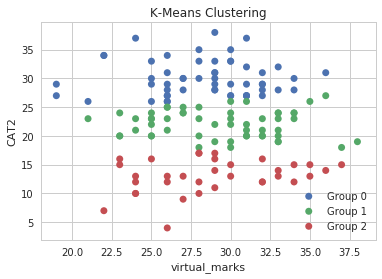

In [91]:
cents, labels = visualize_clustering_in_KMeans(['virtual_marks', 'CAT2'])

Total candidates with label 0 =  64
Males with label 0 =  45
Females with label 0 =  19


Total candidates with label 2 =  47
Males with label 2 =  22
Females with label 2 =  25


Total candidates with label 1 =  31
Males with label 1 =  16
Females with label 1 =  15




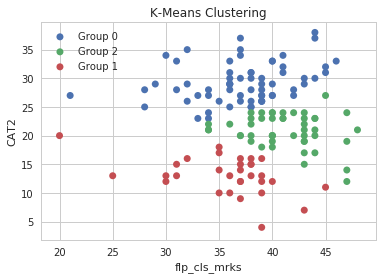

In [92]:
cents, labels = visualize_clustering_in_KMeans(['flp_cls_mrks', 'CAT2'])

## Agglomerative Clustering (Hierarchical Clustering)

Total candidates with label 0 =  65
Males with label 0 =  39
Females with label 0 =  26


Total candidates with label 1 =  47
Males with label 1 =  29
Females with label 1 =  18


Total candidates with label 2 =  30
Males with label 2 =  15
Females with label 2 =  15




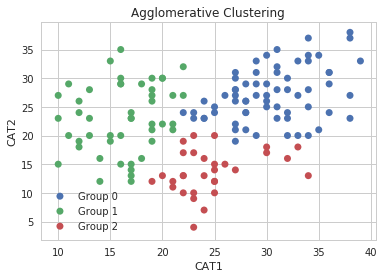

In [93]:
def visualize_clustering_in_agglomerative(column_list):
    kmeans = AgglomerativeClustering(n_clusters=3).fit(combined[column_list])
    y_kmeans = kmeans.fit_predict(combined[column_list])
    labels = pd.DataFrame(y_kmeans)

    for i in labels.iloc[:, 0].unique():
        label_filter = labels.iloc[:, 0] == i
        plt.scatter(combined[column_list[0]][(label_filter == True)], combined[column_list[1]][(label_filter == True)], edgecolors='none', label="Group {:g}".format(i))
        print('Total candidates with label %d = '%i, len(combined[(label_filter == True)]))
        print('Males with label %d = '%i, len(combined[(label_filter == True) & (combined['gender']=='M')]))
        print('Females with label %d = '%i, len(combined[(label_filter == True) & (combined['gender']=='F')]))
        print('\n')
    
    plt.legend()
    plt.title('Agglomerative Clustering')    
    plt.xlabel(column_list[0])
    plt.ylabel(column_list[1])    
    return labels

labels = visualize_clustering_in_agglomerative(['CAT1', 'CAT2'])

Total candidates with label 2 =  39
Males with label 2 =  25
Females with label 2 =  14


Total candidates with label 0 =  56
Males with label 0 =  35
Females with label 0 =  21


Total candidates with label 1 =  47
Males with label 1 =  23
Females with label 1 =  24




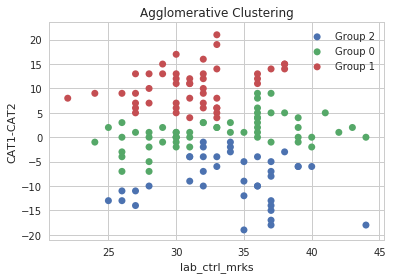

In [94]:
labels = visualize_clustering_in_agglomerative(['lab_ctrl_mrks', 'CAT1-CAT2'])

Total candidates with label 1 =  41
Males with label 1 =  28
Females with label 1 =  13


Total candidates with label 0 =  65
Males with label 0 =  37
Females with label 0 =  28


Total candidates with label 2 =  36
Males with label 2 =  18
Females with label 2 =  18




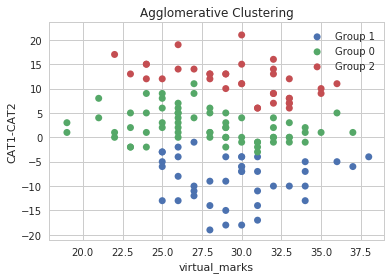

In [95]:
labels = visualize_clustering_in_agglomerative(['virtual_marks', 'CAT1-CAT2'])

Total candidates with label 1 =  48
Males with label 1 =  34
Females with label 1 =  14


Total candidates with label 0 =  65
Males with label 0 =  35
Females with label 0 =  30


Total candidates with label 2 =  29
Males with label 2 =  14
Females with label 2 =  15




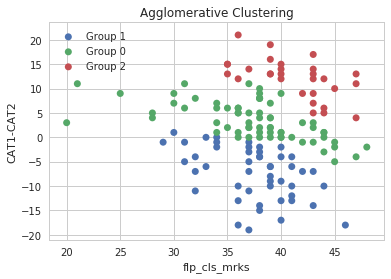

In [96]:
labels = visualize_clustering_in_agglomerative(['flp_cls_mrks', 'CAT1-CAT2'])

Total candidates with label 0 =  55
Males with label 0 =  35
Females with label 0 =  20


Total candidates with label 2 =  55
Males with label 2 =  32
Females with label 2 =  23


Total candidates with label 1 =  32
Males with label 1 =  16
Females with label 1 =  16




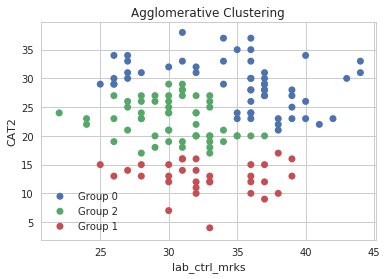

In [97]:
labels = visualize_clustering_in_agglomerative(['lab_ctrl_mrks', 'CAT2'])

Total candidates with label 0 =  71
Males with label 0 =  48
Females with label 0 =  23


Total candidates with label 1 =  58
Males with label 1 =  29
Females with label 1 =  29


Total candidates with label 2 =  13
Males with label 2 =  6
Females with label 2 =  7




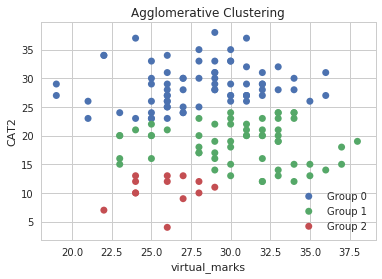

In [98]:
labels = visualize_clustering_in_agglomerative(['virtual_marks', 'CAT2'])

Total candidates with label 0 =  56
Males with label 0 =  41
Females with label 0 =  15


Total candidates with label 1 =  66
Males with label 1 =  33
Females with label 1 =  33


Total candidates with label 2 =  20
Males with label 2 =  9
Females with label 2 =  11




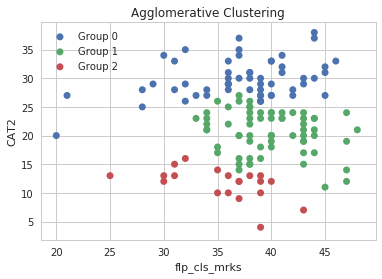

In [99]:
labels = visualize_clustering_in_agglomerative(['flp_cls_mrks', 'CAT2'])

## Fuzzy C Means clustering

Total candidates with label 0 =  58
Males with label 0 =  36
Females with label 0 =  22


Total candidates with label 1 =  44
Males with label 1 =  29
Females with label 1 =  15


Total candidates with label 2 =  40
Males with label 2 =  18
Females with label 2 =  22




/home/prateek/anaconda3/envs/dltfgpu/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


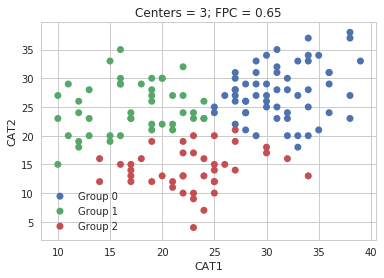

In [101]:
def visualize_clustering_in_fc(column_list):
    data = combined[column_list].as_matrix().T
    cntr, u, u0, d, jm, p, fpc = cmeans(data, 3, 2, error=0.005, maxiter=1000, init=None)
    fpcs = []
    fpcs.append(fpc)
    cluster_membership = np.argmax(u, axis=0)
    
    for i in np.unique(cluster_membership):
        label_filter = (cluster_membership == i)
        plt.scatter(combined[column_list[0]][(label_filter == True)], combined[column_list[1]][(label_filter == True)], edgecolors='none', label="Group {:g}".format(i))
        print('Total candidates with label %d = '%i, len(combined[(label_filter == True)]))
        print('Males with label %d = '%i, len(combined[(label_filter == True) & (combined['gender']=='M')]))
        print('Females with label %d = '%i, len(combined[(label_filter == True) & (combined['gender']=='F')]))
        print('\n')
    
    plt.legend()
    plt.title('Centers = {0}; FPC = {1:.2f}'.format(3, fpc))    
    plt.xlabel(column_list[0])
    plt.ylabel(column_list[1])    

    
visualize_clustering_in_fc(['CAT1', 'CAT2'])

Total candidates with label 0 =  66
Males with label 0 =  39
Females with label 0 =  27


Total candidates with label 1 =  45
Males with label 1 =  22
Females with label 1 =  23


Total candidates with label 2 =  31
Males with label 2 =  22
Females with label 2 =  9




/home/prateek/anaconda3/envs/dltfgpu/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


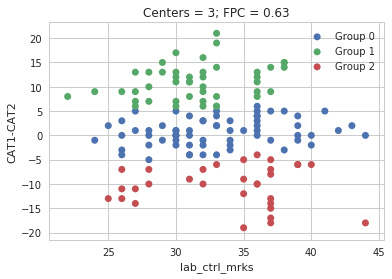

In [102]:
labels = visualize_clustering_in_fc(['lab_ctrl_mrks', 'CAT1-CAT2'])

/home/prateek/anaconda3/envs/dltfgpu/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Total candidates with label 0 =  32
Males with label 0 =  22
Females with label 0 =  10


Total candidates with label 1 =  70
Males with label 1 =  42
Females with label 1 =  28


Total candidates with label 2 =  40
Males with label 2 =  19
Females with label 2 =  21




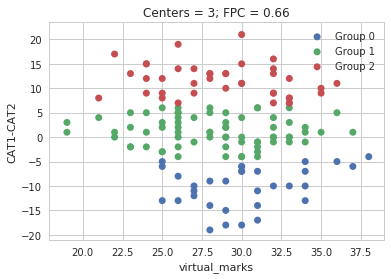

In [103]:
labels = visualize_clustering_in_fc(['virtual_marks', 'CAT1-CAT2'])

/home/prateek/anaconda3/envs/dltfgpu/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Total candidates with label 0 =  33
Males with label 0 =  22
Females with label 0 =  11


Total candidates with label 1 =  40
Males with label 1 =  19
Females with label 1 =  21


Total candidates with label 2 =  69
Males with label 2 =  42
Females with label 2 =  27




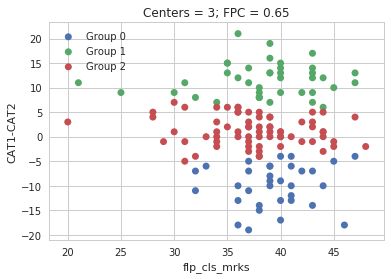

In [104]:
labels = visualize_clustering_in_fc(['flp_cls_mrks', 'CAT1-CAT2'])

Total candidates with label 0 =  48
Males with label 0 =  33
Females with label 0 =  15


Total candidates with label 1 =  41
Males with label 1 =  23
Females with label 1 =  18


Total candidates with label 2 =  53
Males with label 2 =  27
Females with label 2 =  26




/home/prateek/anaconda3/envs/dltfgpu/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


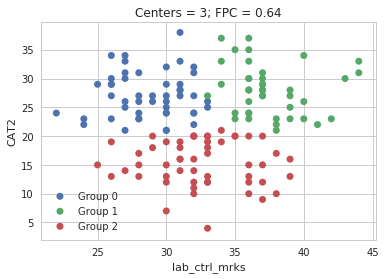

In [105]:
labels = visualize_clustering_in_fc(['lab_ctrl_mrks', 'CAT2'])

Total candidates with label 0 =  52
Males with label 0 =  37
Females with label 0 =  15


Total candidates with label 1 =  35
Males with label 1 =  19
Females with label 1 =  16


Total candidates with label 2 =  55
Males with label 2 =  27
Females with label 2 =  28




/home/prateek/anaconda3/envs/dltfgpu/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


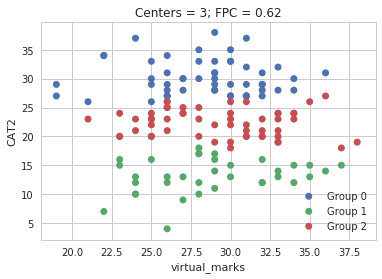

In [106]:
labels = visualize_clustering_in_fc(['virtual_marks', 'CAT2'])

/home/prateek/anaconda3/envs/dltfgpu/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Total candidates with label 0 =  51
Males with label 0 =  23
Females with label 0 =  28


Total candidates with label 1 =  35
Males with label 1 =  19
Females with label 1 =  16


Total candidates with label 2 =  56
Males with label 2 =  41
Females with label 2 =  15




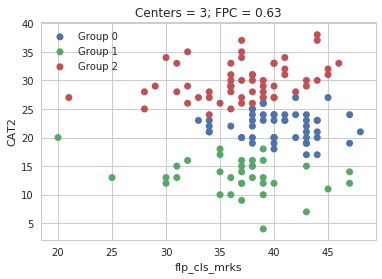

In [107]:
labels = visualize_clustering_in_fc(['flp_cls_mrks', 'CAT2'])